In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from egbm_gam import Explainer
from sklearn import metrics

In [10]:
k = 10
max_depth = 1

lgbm_model = lgb.LGBMRegressor(max_depth = max_depth)

explainer = Explainer(
    n_epochs=2000,
    weights_lr=0.05,
    gbm_lr=0.01,
    init_type='zeros',
    norm_target=True,
    init_est_type='mean',
    optimal_weights=100,
    optimal_rate=0.01,
    optimal_iter=500,
    optimal_period=20,
    pretraining_iter=1,
    tree_max_depth = max_depth,
    enable_history=True
)

df = pd.read_csv("boston_housing.csv")
shuffled = df.sample(frac=1)
datasets = np.array_split(shuffled, k)
lgbm_importances = np.zeros((k,13))
egbm_importances = np.zeros((k,13))
MSEs = {"EGBM": [], "LGBM": []}

for i in range(k):
    data = datasets.copy()
    #Split datasets
    test_set = data[i]
    data.pop(i)
    train_set = pd.concat(data)
    x_train, y_train = train_set.drop("medv", axis=1), train_set["medv"]
    x_test, y_test = test_set.drop("medv", axis=1), test_set["medv"]
    #Fit LGBM model
    lgbm_model.fit(x_train, y_train, verbose=-1)
    #Predict using LGBM model
    lgbm_pred = lgbm_model.predict(x_test)
    #get LGBM feature importances
    lgbm_importances[i] = lgbm_model.feature_importances_    

    #Fit EGBM model
    x_train, x_test, y_train, y_test = x_train.to_numpy(), x_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
    explainer.fit(x_train, y_train)
    #Predict using EGBM model
    egbm_pred = explainer.predict(x_test)
    #get EGBM feature importances
    egbm_importance = explainer.get_corrected_weights(x_train)
    importance = [abs(item) for item in egbm_importance]
    importance = [(int) (round(item/sum(importance),2)*100) for item in importance]
    egbm_importances[i] = importance

    #add MSE of two models
    mse_egbm = (metrics.mean_squared_error(y_test, egbm_pred))
    mse_lgbm = (metrics.mean_squared_error(y_test, lgbm_pred))
    MSEs["EGBM"].append(mse_egbm)
    MSEs["LGBM"].append(mse_lgbm)


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

In [11]:
MSE_table = pd.DataFrame(MSEs)
mean_mse_lgbm = MSE_table["LGBM"].mean()
mean_mse_egbm = MSE_table["EGBM"].mean()
print("LGBM: ", mean_mse_lgbm, "EGBM: ", mean_mse_egbm)
MSE_table



LGBM:  15.890053080534514 EGBM:  14.638264218648459


,EGBM,LGBM
0,10.041668,11.643801
1,8.177111,14.307110
2,9.442891,13.577287
3,48.087257,50.108839
4,9.899183,9.446710
5,9.011771,8.389104
6,13.132446,12.757560
7,14.153566,15.454581
8,17.632467,15.538174
9,6.804282,7.677363


[ 8.6  0.   0.   4.5  9.4 18.2  0.  13.2  0.   5.6 11.9  4.  24.6]
[ 5.4  1.7  0.5  3.5  8.9 21.7  0.2 11.2  4.6  4.6  9.3  3.8 25.1]


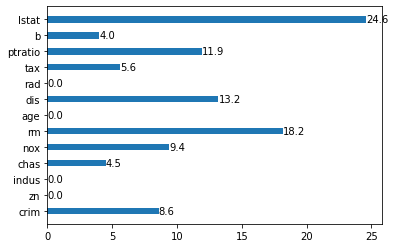

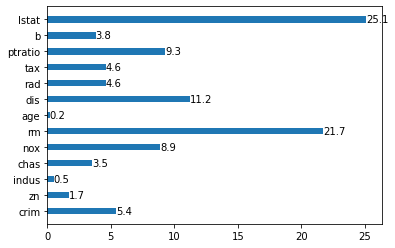

In [9]:
mean_lgbm_importance = lgbm_importances.mean(axis=0)
mean_egbm_importance = egbm_importances.mean(axis=0)
print(mean_lgbm_importance)
print(mean_egbm_importance)

X, Y = df.drop("medv", axis=1), df["medv"]

fig = plt.barh(X.columns, mean_lgbm_importance, 0.4)
plt.bar_label(fig, mean_lgbm_importance)
plt.show()

fig_2 = plt.barh(X.columns, mean_egbm_importance, 0.4)
plt.bar_label(fig_2, mean_egbm_importance)
plt.show()

In [5]:
from pydoc import describe


df["rad"].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 23)

new_depth = 10

lgbm_model = lgb.LGBMRegressor(max_depth = new_depth)

explainer = Explainer(
    n_epochs=2000,
    weights_lr=0.05,
    gbm_lr=0.01,
    init_type='zeros',
    norm_target=True,
    init_est_type='mean',
    optimal_weights=100,
    optimal_rate=0.01,
    optimal_iter=500,
    optimal_period=20,
    pretraining_iter=1,
    tree_max_depth = new_depth,
    enable_history=True
)

#Fit LGBM model
lgbm_model.fit(x_train, y_train, verbose=-1)
#Predict using LGBM model
lgbm_pred = lgbm_model.predict(x_test)
#get LGBM feature importances
importance_1 = lgbm_model.feature_importances_ 
importance_1 = [(int) (round(item/sum(importance_1),2)*100) for item in importance_1]   

#Fit EGBM model
x_train, x_test, y_train, y_test = x_train.to_numpy(), x_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
explainer.fit(x_train, y_train)
#Predict using EGBM model
egbm_pred = explainer.predict(x_test)
#get EGBM feature importances
egbm_importance = explainer.get_corrected_weights(x_train)
importance_2 = [abs(item) for item in egbm_importance]
importance_2 = [(int) (round(item/sum(importance_2),2)*100) for item in importance_2]



c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [7]:
lgbm_mse = metrics.mean_squared_error(y_test, lgbm_pred)
egbm_mse = metrics.mean_squared_error(y_test, egbm_pred)
print("LGBM: ", lgbm_mse, "EGBM: ", egbm_mse)

LGBM:  13.021917673011467 EGBM:  24.714234243135387


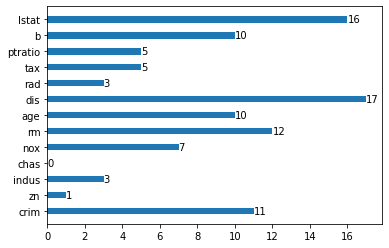

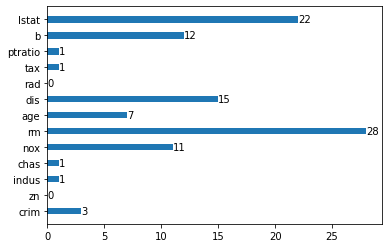

In [8]:
fig = plt.barh(X.columns, importance_1, 0.4)
plt.bar_label(fig, importance_1)
plt.show()

fig_2 = plt.barh(X.columns, importance_2, 0.4)
plt.bar_label(fig_2, importance_2)
plt.show()